<a href="http://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project07B%20-%20Text%20Classification%20Deep%20Learning%20CNN%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification - Deep Learning CNN Models

<img src="https://github.com/dipanjanS/nlp_workshop_dhs18/blob/master/Unit%2012%20-%20Project%209%20-%20Sentiment%20Analysis%20-%20Supervised%20Learning/banner.jpeg?raw=1">

When it comes to text data, sentiment analysis is one of the most widely performed analysis on it. Sentiment Analysis has been through tremendous improvements from the days of classic methods to recent times where in the state of the art models utilize deep learning to improve the performance.

Convolutional Neural Networks or CNNs are the work-horse of the deep learning world. They have, in some sense, brought deep learning research into mainstream discussions. The advancements in the image classification world has left even humans behind.

<img src="https://github.com/dipanjanS/nlp_workshop_dhs18/blob/master/Unit%2012%20-%20Project%209%20-%20Sentiment%20Analysis%20-%20Supervised%20Learning/cnn.png?raw=1">
In this project, we will attempt at performing sentiment analysis utilizing the power of CNNs.

In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import re
from pandas import read_excel
dataset=pd.read_csv('/content/drive/MyDrive/nlp bio informatics/final_rediology_data.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# take a peek at the data
dataset.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal
...,...,...
3950,Clear lungs bilaterally. Normal cardiac contou...,normal
3951,Heart size normal. Lungs clear. Stable 5 mm ca...,abnormal
3952,The cardiac and mediastinal silhouettes are un...,abnormal
3953,Heart size normal. Lungs are clear. are norma...,normal


In [ ]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=0)

### Prepare Train Test Split

In [ ]:
from nltk.parse.util import TestGrammar
# build train and test datasets
reviews = dataset['fulltext'].values
sentiments = dataset['label'].values

train_reviews = train['fulltext'].values
train_sentiments = train['label'].values

test_reviews = test['fulltext'].values
test_sentiments = test['label'].values

# Text Wrangling & Normalization

In [ ]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata


def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    norm_docs.append(doc)

  return norm_docs

In [ ]:
features = train.iloc[:, 0].values
labels = train.iloc[:, -1].values

In [ ]:
def pre_process_corpus():
  processed_features = []

  for sentence in range(0, len(features)):
      # Remove all the special characters
      processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

      # remove all single characters
      processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

      # Remove single characters from the start
      processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

      # Substituting multiple spaces with single space
      processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

      # Removing prefixed 'b'
      processed_feature = re.sub(r'^b\s+', '', processed_feature)

      # Converting to Lowercase
      processed_feature = processed_feature.lower()

      processed_features.append(processed_feature)
  return processed_features

In [ ]:
norm_train_reviews = pre_process_corpus()


In [ ]:
features1 = test.iloc[:, 0].values
labels1 = test.iloc[:, -1].values

In [ ]:
def pre_process_corpus1():
  processed_features = []

  for sentence in range(0, len(features1)):
      # Remove all the special characters
      processed_feature = re.sub(r'\W', ' ', str(features1[sentence]))

      # remove all single characters
      processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

      # Remove single characters from the start
      processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

      # Substituting multiple spaces with single space
      processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

      # Removing prefixed 'b'
      processed_feature = re.sub(r'^b\s+', '', processed_feature)

      # Converting to Lowercase
      processed_feature = processed_feature.lower()

      processed_features.append(processed_feature)
  return processed_features

In [ ]:
norm_test_reviews = pre_process_corpus1()

## Preprocessing

To prepare text data for our deep learning model, we transform each review into a sequence.
Every word in the review is mapped to an integer index and thus the sentence turns into a sequence of numbers.

To perform this transformation, keras provides the ```Tokenizer```

In [ ]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(norm_train_reviews)
t.word_index['<PAD>'] = 0

In [ ]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('hypertrophy', 1893), ('<PAD>', 0), 1)

In [ ]:
train_sequences = t.texts_to_sequences(norm_train_reviews)

In [ ]:
test_sequences = t.texts_to_sequences(norm_test_reviews)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=1894
Number of Documents=2535


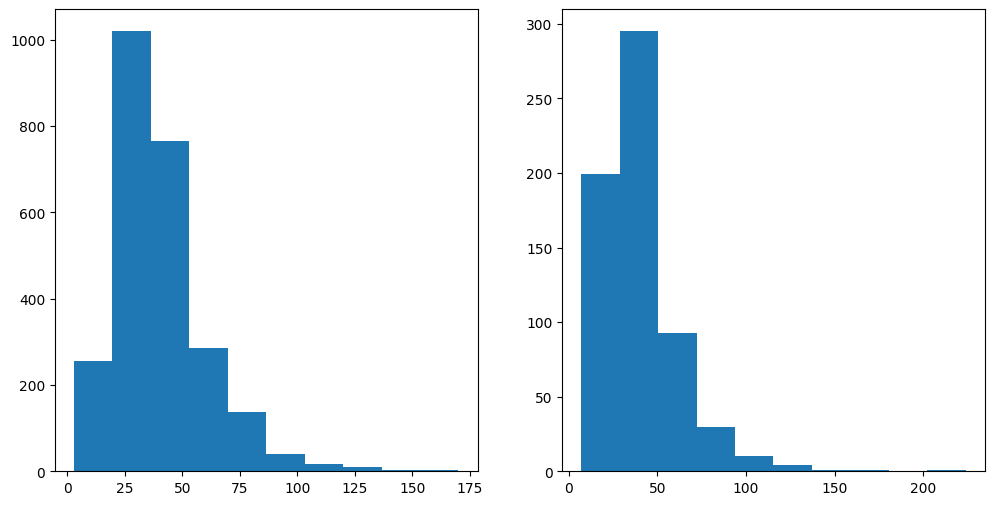

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

### Sequence Normalization

Not all reviews are of same length. To handle this difference in length of reviews, we define a maximum length.
For reviews which are smaller than this length, we pad them with zeros which longer ones are truncated

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
!pip install keras


In [ ]:
from keras.utils import pad_sequences
from keras.utils import pad_sequences
import keras



# pad dataset to a maximum review length in words
X_train = keras.utils.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = keras.utils.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((2535, 1000), (634, 1000))

### Encoding Labels

The dataset contains labels of the form positive/negative. The following step encodes the labels using ```sklearn's``` ```LabelEncoder```

In [ ]:
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [ ]:
y_train = le.fit_transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
VOCAB_SIZE = len(t.word_index)

## Prepare the Model

Since textual data is a sequence of words, we utilize ```1D``` convolutions to scan through the sentences.
The model first transforms each word into lower dimensional embedding/vector space followed by 1d convolutions and then passing the data through dense layers before the final layer for classification

In [ ]:
EMBED_SIZE = 300
EPOCHS=5
BATCH_SIZE=128

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         568200    
                                                                 
 conv1d (Conv1D)             (None, 1000, 128)         153728    
                                                                 
 max_pooling1d (MaxPooling1  (None, 500, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 250, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 32)           8

## Model Training

In [ ]:
batch_size = 32
model.fit(X_train, y_train, epochs=10, batch_size=32,
          shuffle=True, verbose=1)

Epoch 1/10
80/80 [==============================] - 31s 236ms/step - loss: 0.3026 - accuracy: 0.8730
Epoch 2/10
80/80 [==============================] - 11s 142ms/step - loss: 0.1048 - accuracy: 0.9609
Epoch 3/10
80/80 [==============================] - 5s 64ms/step - loss: 0.0723 - accuracy: 0.9775
Epoch 4/10
80/80 [==============================] - 6s 73ms/step - loss: 0.0566 - accuracy: 0.9846
Epoch 5/10
80/80 [==============================] - 4s 48ms/step - loss: 0.0494 - accuracy: 0.9858
Epoch 6/10
80/80 [==============================] - 3s 36ms/step - loss: 0.0438 - accuracy: 0.9874
Epoch 7/10
80/80 [==============================] - 3s 43ms/step - loss: 0.0357 - accuracy: 0.9909
Epoch 8/10
80/80 [==============================] - 3s 41ms/step - loss: 0.0303 - accuracy: 0.9917
Epoch 9/10
80/80 [==============================] - 2s 23ms/step - loss: 0.0345 - accuracy: 0.9886
Epoch 10/10
80/80 [==============================] - 2s 26ms/step - loss: 0.0248 - accuracy: 0.9929


## Model Evaluation

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

20/20 [==============================] - 1s 17ms/step - loss: 0.3017 - accuracy: 0.9432
Accuracy: 94.32%


In [ ]:
prediction_probs = model.predict(X_test, verbose=1).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]

20/20 [==============================] - 0s 5ms/step


In [ ]:
predictions = ['normal' if item == 1 else 'abnormal' for item in predictions]
predictions

['abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'normal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnormal',
 'abnormal',
 'abnormal',
 'abnormal',
 'normal',
 'abnor

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['normal', 'abnormal']
print(classification_report(test_sentiments, predictions))
pd.DataFrame(confusion_matrix(test_sentiments, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    abnormal       0.96      0.96      0.96       487
      normal       0.87      0.88      0.88       147

    accuracy                           0.94       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.94      0.94      0.94       634



,normal,abnormal
normal,468,19
abnormal,17,130


In [ ]:
print(confusion_matrix(test_sentiments, predictions))


[[468  19]
 [ 17 130]]


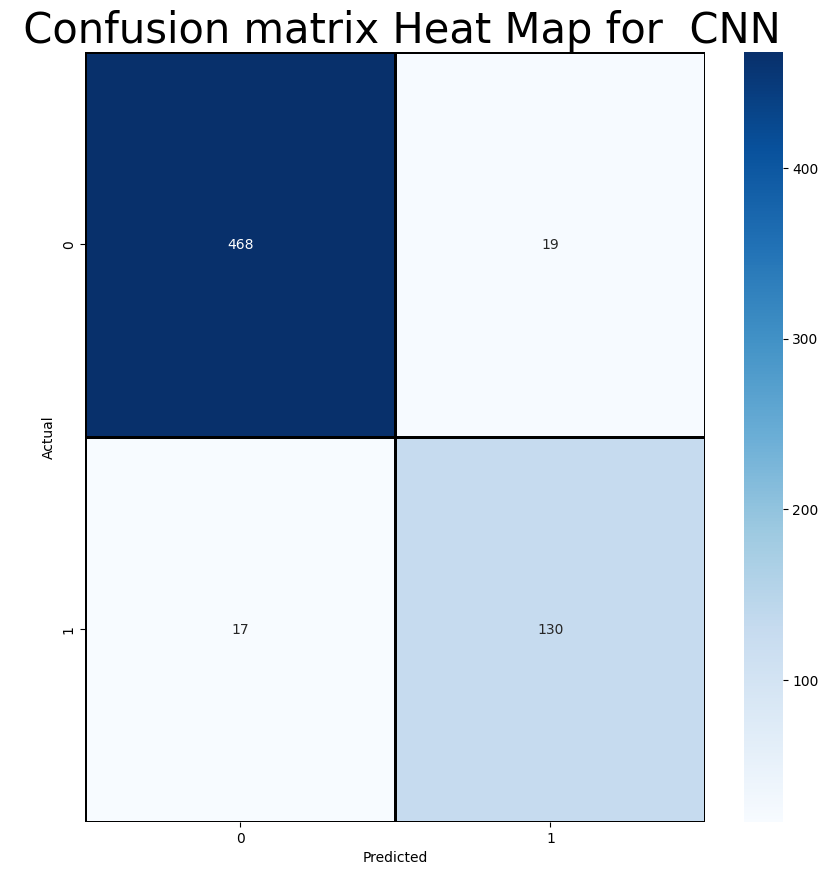

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
plt.title(" Confusion matrix Heat Map for  CNN")

cm = metrics.confusion_matrix(test_sentiments, predictions)
sn.set(font_scale=2.5)